In [19]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

from wordcloud import WordCloud 
import matplotlib.pyplot as plt
import seaborn as sns

In [20]:
url = "https://www.airlinequality.com/airline-reviews/british-airways"
res = requests.get(url)
htmlData = res.content
print(htmlData)

b'<!doctype html>\n\n<!--[if lt IE 7]> <html class="no-js lt-ie9 lt-ie8 lt-ie7 lt-ie10" lang="en-GB"> <![endif]-->\n<!--[if IE 7]>    <html class="no-js lt-ie9 lt-ie8 lt-ie10" lang="en-GB"> <![endif]-->\n<!--[if IE 8]>    <html class="no-js lt-ie9 lt-ie10" lang="en-GB"> <![endif]-->\n<!--[if IE 9]>    <html class="no-js lt-ie10" lang="en-GB"> <![endif]-->\n<!--[if gt IE 8]><!-->\n<html lang="en-GB">\n<!--<![endif]-->\n\n<head>\n    <meta charset="utf-8">\n\n    <title>British Airways Customer Reviews - SKYTRAX</title>\n\n    <!-- Google Chrome Frame for IE -->\n    <meta http-equiv="X-UA-Compatible" content="IE=edge,chrome=1">\n\n    <!-- mobile meta -->\n    <meta name="HandheldFriendly" content="True">\n    <meta name="MobileOptimized" content="320">\n    <meta name="viewport"\n        content="width=device-width, initial-scale=1.0, minimum-scale=1.0, maximum-scale=1.0, user-scalable=no" />\n    <!-- icons & favicons -->\n    <link rel="apple-touch-icon" href="https://www.airlinequal

In [21]:
base_url="https://www.airlinequality.com/airline-reviews/british-airways"
pages=10
page_size=100

reviews= []
aircraft=[]
seat_type=[]
route=[]
recommended=[]
df=pd.DataFrame()

# for i in range(1, pages + 1):
for i in range(1, pages + 1):
    
    rating = []
    category = []

    print(f"Scraping page {i}")

    # Create URL to collect links from paginated data
    url = f"{base_url}/page/{i}/?sortby=post_date%3ADesc&pagesize={page_size}"

    # Collect HTML data from this page
    response = requests.get(url)

    # Parse content
    content = response.content
    parsed_content = BeautifulSoup(content, 'html.parser')
    for para in parsed_content.find_all("div", {"class": "text_content"}):
        reviews.append(para.get_text())
        
    for para2 in parsed_content.find_all("div", {"class" : "review-stats"}):
        for para3 in para2.find_all('td',{'class' : 'review-value'}):
            rating.append(para3.get_text())
        recomend = rating[-1]
        rating = rating[:-1]
        
        for para4 in para2.find_all('td',{'class' : 'review-rating-stars stars'}):
            para5 = len(para4.find_all('span', {'class' : 'star fill'}))
            rating.append(para5)
        rating.append(recomend)
        #print(rating)
        
        for para6 in para2.find_all('td',{'class' : 'review-rating-header'}):
            category.append(para6.get_text())
            
            #print(category)
        # Create the records from both list, using zip and dict calls.

        # Build the dataframe from the dictionary.
        data_dict = pd.DataFrame([rating], columns=category)
        df = df.append(data_dict, ignore_index=True).reset_index(drop=True)
        #print(df)
        rating = []
        category = []
        
    print(f"   ---> {len(reviews)} total reviews")

df["reviews"] = reviews


Scraping page 1
   ---> 100 total reviews
Scraping page 2
   ---> 200 total reviews
Scraping page 3
   ---> 300 total reviews
Scraping page 4
   ---> 400 total reviews
Scraping page 5
   ---> 500 total reviews
Scraping page 6
   ---> 600 total reviews
Scraping page 7
   ---> 700 total reviews
Scraping page 8
   ---> 800 total reviews
Scraping page 9
   ---> 900 total reviews
Scraping page 10
   ---> 1000 total reviews


In [22]:
df.sample(5)

,Aircraft,Type Of Traveller,Seat Type,Route,Date Flown,Seat Comfort,Cabin Staff Service,Food & Beverages,Ground Service,Value For Money,Recommended,Inflight Entertainment,Wifi & Connectivity,reviews
220,NaN,Couple Leisure,Economy Class,Johannesburg to Los Angeles via London,January 2023,2.0,2.0,2.0,1.0,2,no,NaN,NaN,Not Verified | It seems that there is a race t...
260,NaN,Solo Leisure,Economy Class,Dusseldorf to London via Los Angeles,August 2022,1.0,1.0,1.0,1.0,1,no,1.0,1.0,✅ Trip Verified | This is the worst experience...
142,NaN,Business,Economy Class,New York to London,April 2023,4.0,3.0,3.0,1.0,1,no,3.0,4.0,✅ Trip Verified | Despite being a gold member...
679,A320,Couple Leisure,Business Class,London Heathrow to Lisbon,November 2019,4.0,1.0,2.0,5.0,2,no,NaN,NaN,✅ Trip Verified | London Heathrow to Lisbon. M...
850,NaN,Couple Leisure,Economy Class,London Heathrow to Dubai,May 2019,NaN,NaN,NaN,NaN,1,no,NaN,NaN,✅ Trip Verified | London Heathrow to Dubai. L...


In [23]:
df.to_csv("BA_reviews.csv",index=False)

In [24]:
df=pd.read_csv("BA_reviews.csv")

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Aircraft                540 non-null    object 
 1   Type Of Traveller       998 non-null    object 
 2   Seat Type               1000 non-null   object 
 3   Route                   997 non-null    object 
 4   Date Flown              1000 non-null   object 
 5   Seat Comfort            912 non-null    float64
 6   Cabin Staff Service     906 non-null    float64
 7   Food & Beverages        791 non-null    float64
 8   Ground Service          942 non-null    float64
 9   Value For Money         1000 non-null   int64  
 10  Recommended             1000 non-null   object 
 11  Inflight Entertainment  535 non-null    float64
 12  Wifi & Connectivity     290 non-null    float64
 13  reviews                 1000 non-null   object 
dtypes: float64(6), int64(1), object(7)
memory

In [26]:
df.shape

(1000, 14)

In [27]:
df.describe()

,Seat Comfort,Cabin Staff Service,Food & Beverages,Ground Service,Value For Money,Inflight Entertainment,Wifi & Connectivity
count,912.000000,906.000000,791.000000,942.000000,1000.000000,535.000000,290.000000
mean,2.759868,3.192053,2.676359,2.617834,2.404000,2.803738,2.227586
std,1.386944,1.517698,1.473456,1.546454,1.483572,1.469026,1.532778
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000
50%,3.000000,3.000000,3.000000,3.000000,2.000000,3.000000,1.000000
75%,4.000000,5.000000,4.000000,4.000000,4.000000,4.000000,3.000000
max,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


In [28]:
df.isnull().count()

Aircraft                  1000
Type Of Traveller         1000
Seat Type                 1000
Route                     1000
Date Flown                1000
Seat Comfort              1000
Cabin Staff Service       1000
Food & Beverages          1000
Ground Service            1000
Value For Money           1000
Recommended               1000
Inflight Entertainment    1000
Wifi & Connectivity       1000
reviews                   1000
dtype: int64

In [29]:
remove_text = ['✅ Trip Verified', 'Not Verified |']

for i in range(len(df['reviews'])):
    for j in remove_text:
        if j in df['reviews'][i]:
            df['reviews'] = df['reviews'].str.replace(j,'')

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: FutureWarning: The default value of regex will change from True to False in a future version.
  


In [30]:
df.sample(5)

,Aircraft,Type Of Traveller,Seat Type,Route,Date Flown,Seat Comfort,Cabin Staff Service,Food & Beverages,Ground Service,Value For Money,Recommended,Inflight Entertainment,Wifi & Connectivity,reviews
847,NaN,Couple Leisure,Economy Class,London to Tampa,May 2019,1.0,1.0,1.0,1.0,1,no,1.0,NaN,| My boyfriend and I wanted to return from o...
248,A320,Business,Business Class,Glasgow to London,December 2022,5.0,5.0,3.0,5.0,3,no,3.0,3.0,| Glasgow to London delayed by 1 hour. My wi...
738,NaN,Couple Leisure,Business Class,London to Milan,September 2019,1.0,1.0,NaN,1.0,1,no,NaN,NaN,| I wouldn't even rate them 1/10 2 x busines...
350,NaN,Family Leisure,Economy Class,Islamabad to Manchester via Gatwick,April 2022,5.0,5.0,5.0,5.0,4,yes,NaN,NaN,| I travelled on the 11th April with my baby...
366,A320,Couple Leisure,Business Class,Athens to London,May 2022,2.0,4.0,3.0,3.0,2,no,NaN,2.0,| Very low standards for Club Europe: there ...


In [31]:
remove_text = ['✅ Trip Verified', 'Not Verified |']

for text in remove_text:
    df['reviews'] = df['reviews'].str.replace(text, '')

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: FutureWarning: The default value of regex will change from True to False in a future version.
  after removing the cwd from sys.path.


In [32]:
df.sample(5)

,Aircraft,Type Of Traveller,Seat Type,Route,Date Flown,Seat Comfort,Cabin Staff Service,Food & Beverages,Ground Service,Value For Money,Recommended,Inflight Entertainment,Wifi & Connectivity,reviews
920,Boeing 777,Couple Leisure,Economy Class,Tampa to Gatwick,March 2019,2.0,2.0,2.0,1.0,1,no,2.0,NaN,| Tampa to Gatwick. I paid to have my seats ...
216,A380,Solo Leisure,First Class,Heathrow to Johannesburg,January 2023,4.0,5.0,4.0,5.0,4,yes,3.0,3.0,| Excellent service both on the ground and on...
633,Boeing 747,Family Leisure,Business Class,Los Angeles to London Heathrow,January 2020,1.0,3.0,2.0,1.0,1,no,2.0,1.0,| Los Angeles to London Heathrow. If I could ...
427,A320,Business,Business Class,Dublin to London,February 2022,NaN,NaN,NaN,NaN,1,no,NaN,NaN,| Having just booked BA for a return flight - ...
29,A320,Couple Leisure,Business Class,London Heathrow to Porto,September 2023,3.0,4.0,3.0,4.0,4,yes,NaN,NaN,| Check in and security clearance very quick ...


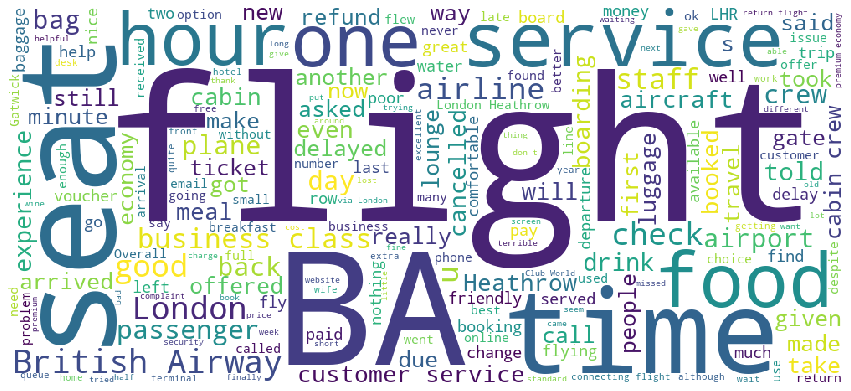

In [35]:
review_word=[]

for i in df['reviews']:
    a=i.split(' ')
    for x in a:
        review_word.append(x)

unique_string=(" ").join(review_word)

wc=WordCloud(width=1000,height=450,background_color='white').generate(unique_string)
plt.figure(figsize=(15,8))
plt.imshow(wc)
plt.axis("off")
plt.show()
        



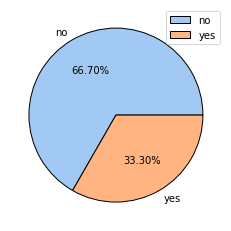

In [37]:
soc=df.groupby('Recommended')['reviews'].count().reset_index()
plt.pie(soc['reviews'],labels=soc['Recommended'],autopct='%.2f%%',colors=sns.color_palette('pastel'),
       wedgeprops={"edgecolor":"k"},)
plt.legend()
plt.show()

In [38]:
df_soc=df[df["Recommended"]=='no']
df_soc.describe()

,Seat Comfort,Cabin Staff Service,Food & Beverages,Ground Service,Value For Money,Inflight Entertainment,Wifi & Connectivity
count,581.000000,575.000000,481.000000,610.000000,667.000000,330.000000,184.000000
mean,2.087780,2.433043,1.856549,1.839344,1.536732,2.160606,1.483696
std,1.087962,1.315395,1.061742,1.192654,0.834549,1.245646,0.963688
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
50%,2.000000,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000
75%,3.000000,3.000000,3.000000,3.000000,2.000000,3.000000,1.000000
max,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


In [39]:
data=df_soc[df_soc['reviews'].str.contains('food | drink')]
data['reviews'].to_csv('test_csv')

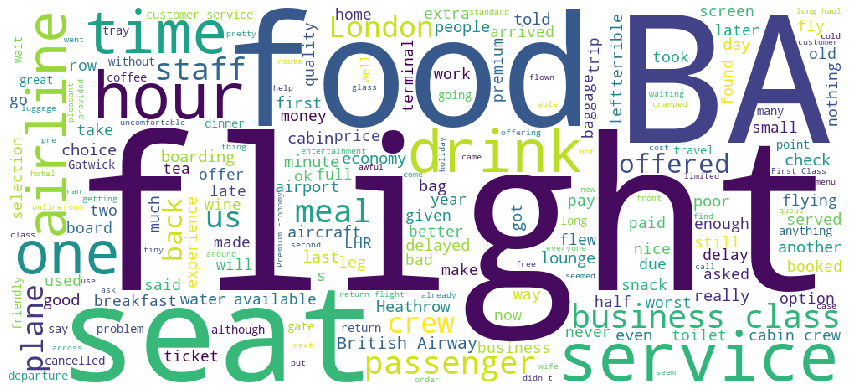

In [43]:
review_word=[]

for i in data['reviews']:
    a=i.split(' ')
    for x in a:
        review_word.append(x)

unique_string=(" ").join(review_word)

wc=WordCloud(width=1000,height=450,background_color='white').generate(unique_string)
plt.figure(figsize=(15,8))
plt.imshow(wc)
plt.axis("off")
plt.show()

In [44]:
data=df_soc[df_soc['reviews'].str.contains('money | refund & value')]
data['reviews'].to_csv('test2_csv')

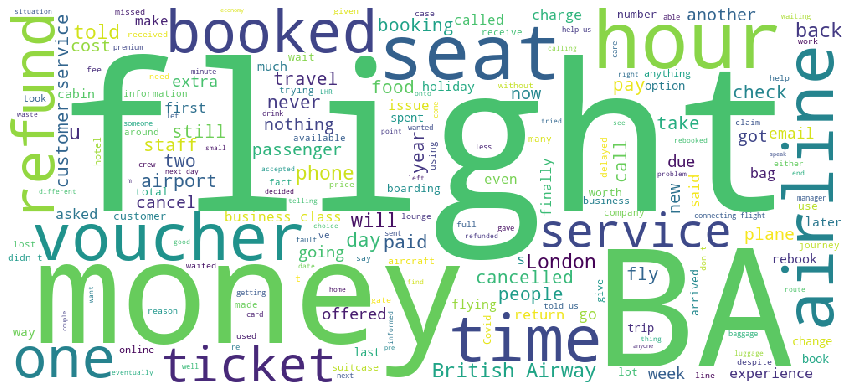

In [46]:
review_word = []

for i in data['reviews'] :
    a = i.split(' ')
    for x in a:
        review_word.append(x)
        
unique_string = (" ").join(review_word)

wc = WordCloud(width = 1000, height = 450, background_color = 'white').generate(unique_string)
plt.figure(figsize=(15,8))
plt.imshow(wc)
plt.axis("off")
plt.show()